This project aims to develop a robust image classification system using machine learning and deep learning techniques. The system incorporates models such as ResNet50, MobileNetV2, DenseNet121, and a custom CNN model. The models are trained on a dataset of images and evaluated using evaluation metrics like accuracy, precision, recall, and F1 score. The trained models are then integrated into a functional application or service that can be used in a real-world setting. This project offers a comprehensive end-to-end solution for image classification tasks, providing accurate and efficient predictions. I will be using Kaggle dataset of most popular car brand images (100 images each) Link - https://www.kaggle.com/datasets/yamaerenay/100-images-of-top-50-car-brands and some extra images from https://www.kaggle.com/datasets/prondeau/the-car-connection-picture-dataset

1. Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.applications import ResNet50, MobileNetV2, DenseNet121
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix




2. Path to the downloaded data

In [2]:
train_dir = 'data/'
test_dir = 'data/'

3. Image preprocessing options

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   # Rescale pixel values to [0,1]
    rotation_range=20,   # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,   # Randomly apply shearing transformation
    zoom_range=0.2,   # Randomly zoom in on images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'   # Fill in missing pixels with nearest value
)

# Rescaling the pixel values of input images to the range of 0 to 1 for improved neural network training.
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Set the image and batch sizes
img_size = (224, 224) 
batch_size = 8

4. Loading and testing images

In [4]:
# The train_generator is created using the flow_from_directory() method of train_datagen. 
# It generates batches of training data from the train_dir directory, resizes the images to the 
# specified img_size, uses a batch size of batch_size, and represents the class labels in a categorical format.

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Test generator ensures that the data is not shuffled during generation.

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 755 images belonging to 5 classes.
Found 755 images belonging to 5 classes.


5. Counting number of classes

In [5]:
num_classes = len(train_generator.class_indices) 

6. List of models to compare. 

**ResNet50**: ResNet50 is known for its depth and the introduction of residual connections. It has 50 layers and addresses the problem of vanishing gradients in deep networks. 

**MobileNetV2**: MobileNetV2 is designed to be efficient and lightweight, making it suitable for mobile and embedded devices. It utilizes depth-wise separable convolutions, which reduce computational complexity while maintaining good accuracy.

**DenseNet121**: DenseNet121 belongs to the DenseNet family, which utilizes dense connections. It has 121 layers and introduces dense connectivity, where each layer is directly connected to every other layer.

**CNN**: CNN is a type of computer program that learns to understand images by finding patterns in them, like edges, curves, or shapes. It uses these patterns to recognize objects or make decisions about what's in a picture, just like our brains do. It's used in various applications like identifying objects in photos, self-driving cars, and even medical imaging.

By comparing these models, we can evaluate their performance on our specific task and determine which one provides the best results. 

In [6]:
models = [
    ('ResNet50', ResNet50(weights='imagenet', include_top=False)),
    ('MobileNetV2', MobileNetV2(weights='imagenet', include_top=False)),
    ('DenseNet121', DenseNet121(weights='imagenet', include_top=False)),
    ('CNN', None)
]

7. Previously mentioned models are trained and evaluated for image classification. The models are compiled, trained, and their accuracy and loss are plotted using subplots for visual analysis.

Epoch 1/20
95/95 [==============================] - 100s 1s/step - loss: 1.8520 - accuracy: 0.2649 - val_loss: 1.7849 - val_accuracy: 0.1682
Epoch 2/20
95/95 [==============================] - 100s 1s/step - loss: 1.7161 - accuracy: 0.2887 - val_loss: 1.5567 - val_accuracy: 0.3457
Epoch 3/20
95/95 [==============================] - 102s 1s/step - loss: 1.5926 - accuracy: 0.2927 - val_loss: 1.5706 - val_accuracy: 0.3457
Epoch 4/20
95/95 [==============================] - 102s 1s/step - loss: 1.5708 - accuracy: 0.3046 - val_loss: 1.5553 - val_accuracy: 0.3444
Epoch 5/20
95/95 [==============================] - 102s 1s/step - loss: 1.5641 - accuracy: 0.3205 - val_loss: 1.5927 - val_accuracy: 0.2146
Epoch 6/20
95/95 [==============================] - 102s 1s/step - loss: 1.5674 - accuracy: 0.3033 - val_loss: 1.5236 - val_accuracy: 0.3457
Epoch 7/20
95/95 [==============================] - 102s 1s/step - loss: 1.5496 - accuracy: 0.3430 - val_loss: 1.5284 - val_accuracy: 0.3457
Epoch 8/20
95

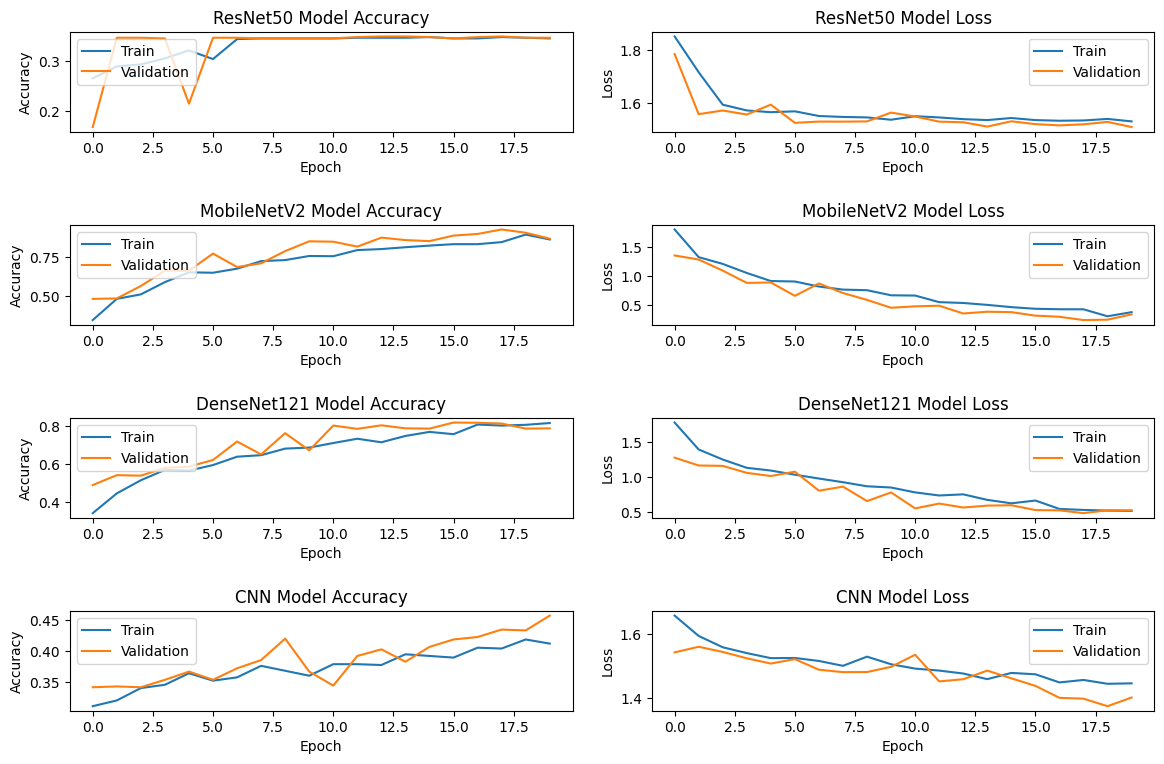

In [7]:
fig, axs = plt.subplots(len(models), 2, figsize=(12, 8))

fig.subplots_adjust(hspace=0.8)  # Increase vertical spacing between subplots

for i, (model_name, base_model) in enumerate(models):
    if model_name == 'CNN':
        # Creating a custom CNN model
        model = tf.keras.Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(num_classes, activation='softmax')
        ])
    else:
        # Add a new classification layer on top of the base model
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        # Create the final model
        model = Model(inputs=base_model.input, outputs=predictions)

        # Freeze the weights of the pre-trained layers
        for layer in base_model.layers:
            layer.trainable = False

    # Compile the model with appropriate optimizer and loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        epochs=20, #20 epochs should be enough.
        validation_data=test_generator
    )

    # Save the model to a file
    if model_name == 'CNN':
        model.save('models/cnn.h5')
    else:
        model.save(f"models/{model_name}.h5")

    # Plot the training and validation accuracy
    axs[i, 0].plot(history.history['accuracy'])
    axs[i, 0].plot(history.history['val_accuracy'])
    axs[i, 0].set_title(f'{model_name} Model Accuracy')
    axs[i, 0].set_xlabel('Epoch')
    axs[i, 0].set_ylabel('Accuracy')
    axs[i, 0].legend(['Train', 'Validation'], loc='upper left')

    # Plot the training and validation loss
    axs[i, 1].plot(history.history['loss'])
    axs[i, 1].plot(history.history['val_loss'])
    axs[i, 1].set_title(f'{model_name} Model Loss')
    axs[i, 1].set_xlabel('Epoch')
    axs[i, 1].set_ylabel('Loss')
    axs[i, 1].legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout(pad=2.0)
plt.show()

Based on our plots, we can see that pre-trained models like MobileNetV2 and DenseNet121 performed the best.These models have more complex architectures compared to ResNet50 and the custom CNN model, which may contribute to their higher accuracy.

8. Evaluation metrics, we can calculate and print classification report (Precision, recall, F1 score and overall accuracy)

In [8]:
# Loading saved models:
densenet_model = tf.keras.models.load_model("models/DenseNet121.h5")
mobilenet_model = tf.keras.models.load_model("models/MobileNetV2.h5")
resnet_model = tf.keras.models.load_model("models/ResNet50.h5")
cnn_model = tf.keras.models.load_model("models/cnn.h5")

# Define a function to evaluate the models and print the classification report:
def evaluate_model(model, generator):
    # Generate predictions on the test data
    y_pred = model.predict(generator)

    # Convert the predicted probabilities to class labels
    y_pred = np.argmax(y_pred, axis=1)

    # Get the true labels from the generator
    y_true = generator.classes

    # Get the class labels
    class_labels = list(generator.class_indices.keys())

    # Print the classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print(report)

#Call the evaluate_model function for each model using the test generator:
print("Densenet model:")
evaluate_model(densenet_model, test_generator)
print("Mobilenet model:")
evaluate_model(mobilenet_model, test_generator)
print("Resnet model:")
evaluate_model(resnet_model, test_generator)
print("Cnn model:")
evaluate_model(cnn_model, test_generator)

Densenet model:
95/95 [==============================] - 55s 563ms/step
               precision    recall  f1-score   support

         Audi       0.88      0.78      0.83       113
          BMW       0.85      0.73      0.78       113
         Ford       0.93      0.68      0.78       121
Mercedes-Benz       0.98      0.75      0.85       258
   Volkswagen       0.54      0.99      0.70       150

     accuracy                           0.79       755
    macro avg       0.84      0.78      0.79       755
 weighted avg       0.85      0.79      0.80       755

Mobilenet model:
95/95 [==============================] - 15s 148ms/step
               precision    recall  f1-score   support

         Audi       0.67      0.96      0.79       113
          BMW       0.83      0.93      0.88       113
         Ford       0.89      0.91      0.90       121
Mercedes-Benz       0.97      0.88      0.92       258
   Volkswagen       0.99      0.71      0.83       150

     accuracy            

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

95/95 [==============================] - 7s 76ms/step
               precision    recall  f1-score   support

         Audi       0.36      0.11      0.16       113
          BMW       0.40      0.37      0.39       113
         Ford       0.49      0.23      0.31       121
Mercedes-Benz       0.47      0.84      0.61       258
   Volkswagen       0.45      0.31      0.37       150

     accuracy                           0.46       755
    macro avg       0.44      0.37      0.37       755
 weighted avg       0.44      0.46      0.41       755



We can clearly see that performance of the models varies significantly. The Densenet and Mobilenet models achieve relatively higher accuracy and F1-scores, while the Resnet model performs poorly with very low accuracy and F1-scores. This suggests that the Resnet model may not be learning effectively or may require further tuning.

9. Testing predictions. I'm loading my saved models and creating a function to train and create predictions.

In [10]:
# Load the saved models
densenet_model = tf.keras.models.load_model("models/DenseNet121.h5")
mobilenet_model = tf.keras.models.load_model("models/MobileNetV2.h5")
resnet_model = tf.keras.models.load_model("models/ResNet50.h5")
cnn_model = tf.keras.models.load_model("models/cnn.h5")

# Define the prediction function
def predict_image(image_path):
    img_size = (224, 224)

    # Load and preprocess the image
    new_image = tf.keras.preprocessing.image.load_img(image_path, target_size=img_size)
    new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
    new_image_array = tf.expand_dims(new_image_array, axis=0)
    new_image_array = new_image_array / 255.0

    # Display the original image
    plt.imshow(new_image)
    plt.axis('off')
    plt.show()

    # Predict using each model
    models = [
        ('DenseNet', densenet_model),
        ('MobileNet', mobilenet_model),
        ('ResNet', resnet_model),
        ('CNN', cnn_model)
    ]

    # Loop over each model in the 'models' list
    for model_name, model in models:

        # Generate predictions for a new image represented by 'new_image_array'
        predictions = model.predict(new_image_array)

        # Determine the index of the predicted class with the highest probability
        predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
        
        # Get the list of class labels from the training data generator
        class_labels = list(train_generator.class_indices.keys())

        # Determine the predicted class label based on the predicted class index
        predicted_class_label = class_labels[predicted_class_index]

        # Calculate the accuracy of the predicted class
        accuracy = predictions[0][predicted_class_index] * 100

        # Print the prediction for the current model
        print(f'{model_name} Prediction: {predicted_class_label} - Accuracy: {accuracy:.2f}%')

10. **Predictions time**

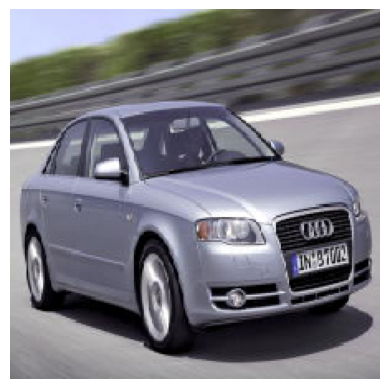

1/1 [==============================] - 0s 125ms/step
DenseNet Prediction: Volkswagen - Accuracy: 83.63%
1/1 [==============================] - 0s 51ms/step
MobileNet Prediction: Audi - Accuracy: 98.85%
1/1 [==============================] - 0s 147ms/step
ResNet Prediction: Mercedes-Benz - Accuracy: 32.74%
1/1 [==============================] - 0s 50ms/step
CNN Prediction: Mercedes-Benz - Accuracy: 33.95%


In [28]:
predict_image("predictdata/audi1.jpg")

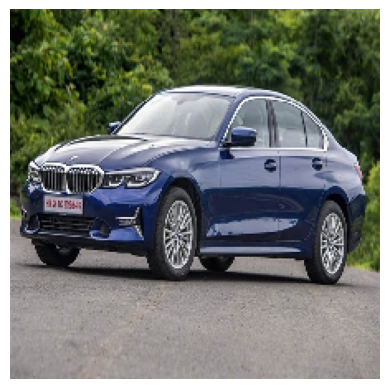

1/1 [==============================] - 0s 126ms/step
DenseNet Prediction: Volkswagen - Accuracy: 67.58%
1/1 [==============================] - 0s 43ms/step
MobileNet Prediction: BMW - Accuracy: 75.49%
1/1 [==============================] - 0s 103ms/step
ResNet Prediction: Mercedes-Benz - Accuracy: 34.08%
1/1 [==============================] - 0s 37ms/step
CNN Prediction: Mercedes-Benz - Accuracy: 30.40%


In [15]:
predict_image("predictdata/bmw1.jpg")

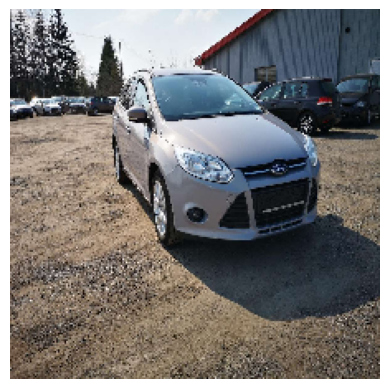

1/1 [==============================] - 0s 124ms/step
DenseNet Prediction: Volkswagen - Accuracy: 72.12%
1/1 [==============================] - 0s 41ms/step
MobileNet Prediction: Ford - Accuracy: 98.97%
1/1 [==============================] - 0s 113ms/step
ResNet Prediction: Mercedes-Benz - Accuracy: 30.78%
1/1 [==============================] - 0s 38ms/step
CNN Prediction: Mercedes-Benz - Accuracy: 26.33%


In [17]:
predict_image("predictdata/ford1.jpg")

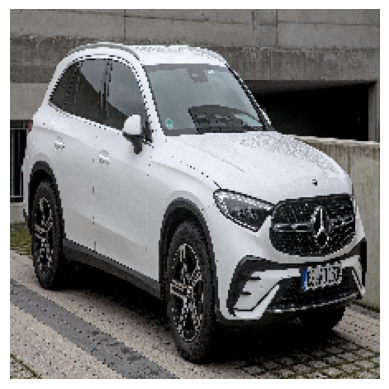

1/1 [==============================] - 0s 159ms/step
DenseNet Prediction: Mercedes-Benz - Accuracy: 55.81%
1/1 [==============================] - 0s 44ms/step
MobileNet Prediction: Mercedes-Benz - Accuracy: 55.57%
1/1 [==============================] - 0s 111ms/step
ResNet Prediction: Mercedes-Benz - Accuracy: 41.15%
1/1 [==============================] - 0s 39ms/step
CNN Prediction: Mercedes-Benz - Accuracy: 36.26%


In [21]:
predict_image("predictdata/Merc1.jpg")

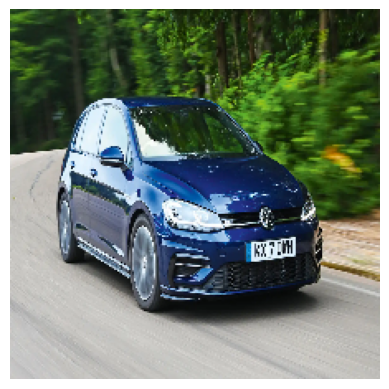

1/1 [==============================] - 0s 163ms/step
DenseNet Prediction: Volkswagen - Accuracy: 91.75%
1/1 [==============================] - 0s 56ms/step
MobileNet Prediction: Ford - Accuracy: 51.60%
1/1 [==============================] - 0s 118ms/step
ResNet Prediction: Mercedes-Benz - Accuracy: 36.81%
1/1 [==============================] - 0s 42ms/step
CNN Prediction: BMW - Accuracy: 24.69%


In [26]:
predict_image("predictdata/Volks1.jpg")

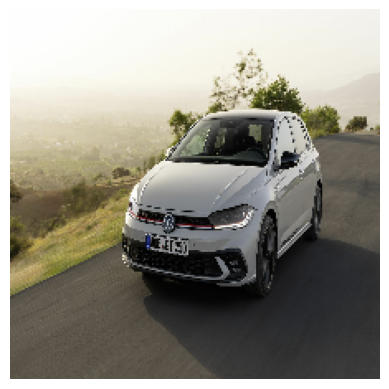

1/1 [==============================] - 0s 221ms/step
DenseNet Prediction: Volkswagen - Accuracy: 97.29%
1/1 [==============================] - 0s 48ms/step
MobileNet Prediction: Mercedes-Benz - Accuracy: 47.73%
1/1 [==============================] - 0s 108ms/step
ResNet Prediction: Mercedes-Benz - Accuracy: 30.87%
1/1 [==============================] - 0s 45ms/step
CNN Prediction: Mercedes-Benz - Accuracy: 39.86%


In [27]:
predict_image("predictdata/Volks2.jpg")

Based on the results, we can see that **MobileNet** is good at predicting most car brands but struggles with identifying Volkswagens. On the other hand, DenseNet excels in accurately predicting Volkswagens, possibly because it has learned unique patterns and features specific to that brand. Although MobileNet performs well overall, it may not have learned the distinguishing characteristics required to correctly classify Volkswagen cars.